## About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

## Problem Statement

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?


How well those variables describe the electric cycle demands

## Understanding the Dataset

datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weather:

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered


## Importing all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, kruskal, f_oneway, ttest_ind, levene, shapiro, chi2_contingency
from statsmodels.graphics.gofplots import qqplot

In [ ]:
df = pd.read_csv('/content/sample_data/Yulu.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

* There are 10886 rows and 12 columns

In [ ]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

* These are all the unique values a column has

In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

* No null values in the dataset

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


* Datatype of following attributes needs to changed to proper data type

datetime - to datetime

season - to categorical

holiday - to categorical

workingday - to categorical

weather - to categorical

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

for i in ['season', 'holiday', 'workingday', 'weather']:
    df[i] = df[i].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


* We can confirm that all the datatypes of columns have been changed.

In [ ]:
df['month']=df['datetime'].dt.month
df['year']=df['datetime'].dt.year

* Lets extract and add month and year columns for further eda to the dataframe

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2011


* Final DataFrame before we begin our analysis

## Univariate Analysis

In [ ]:
cat_cols= ['season', 'holiday', 'workingday', 'weather']
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

* Segregating the categorical and numerical columns for further analysis

In [ ]:
df[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

Lets plot theese values and interpret the graphs.

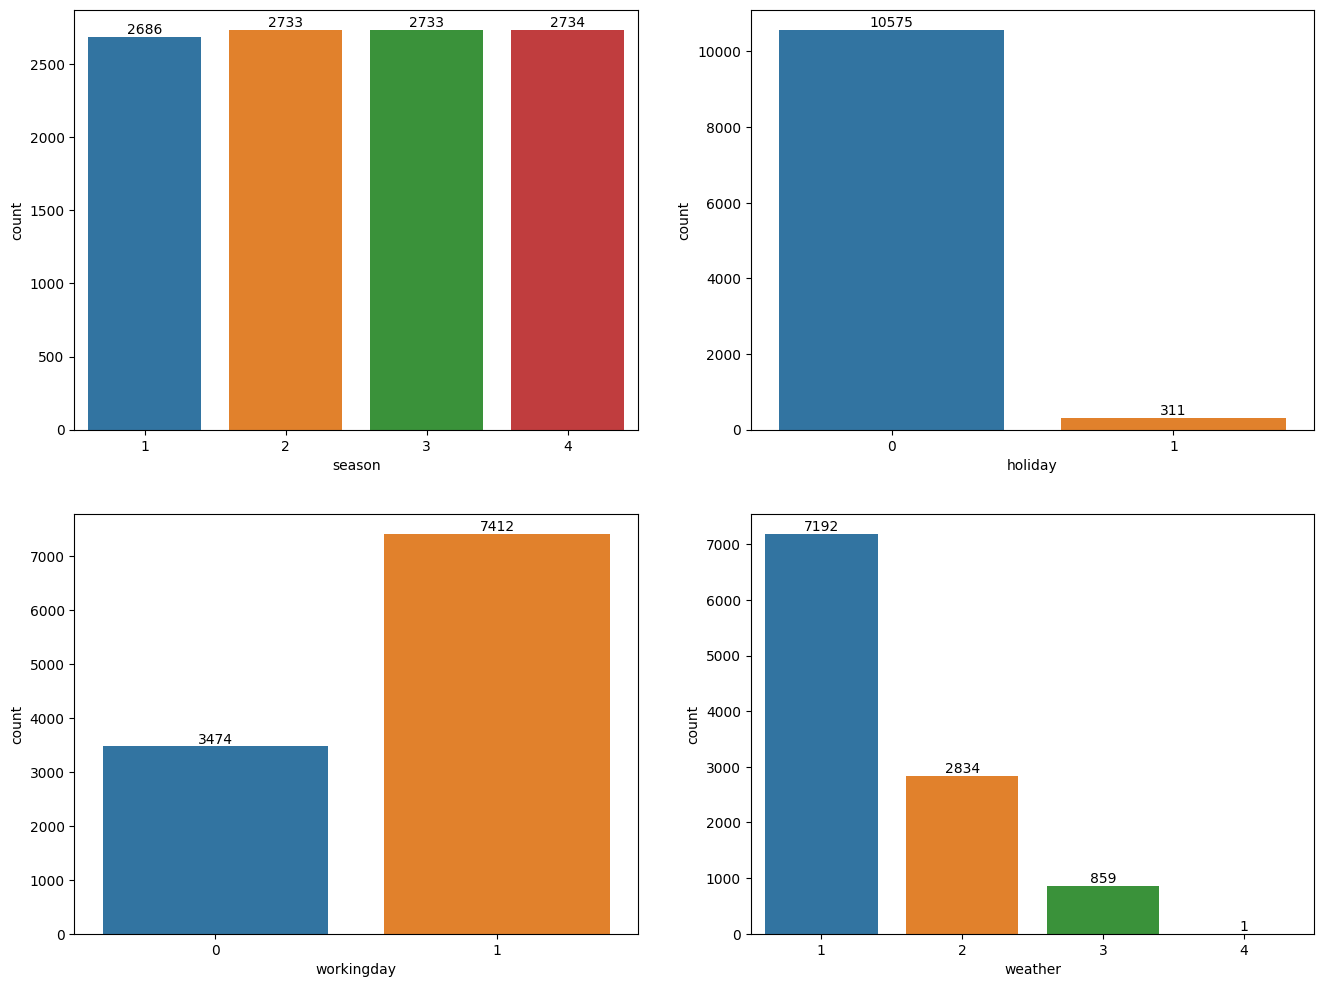

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        label = sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
        for i in label.containers:
            label.bar_label(i)
        index += 1

plt.show()

1. Holiday
* There are 10575 rows of data when there was no holiday
* There are 311 rows of data when there was no holiday

2. Season
* Spring has 2686 entries.
* Summer has has 2733 entries.
* Fall has has 2733 entries.
* Winter has has 2734 entries.

* There are almost equal records of all the seasons.

3. Weather
* There are 7192 entries when the weather was Clear or there were Few clouds or it was partly cloudy
* There are 2834 rows of data when the weather was Mist + Cloudy or Mist + Broken clouds or Mist + Few clouds or complete Mist.
* There are almost 860 entries when the weather was Light Snow or Light Rain + Thunderstorm + Scattered clouds or Light Rain + Scattered clouds
* There was only one record when the weather was Heavy Rain + Ice Pallets + Thunderstorm + Mist or Snow + Fog.

4. workingday
* 3474 entries were made when there was no working day.
* 7412 entries were made when there was a working day.

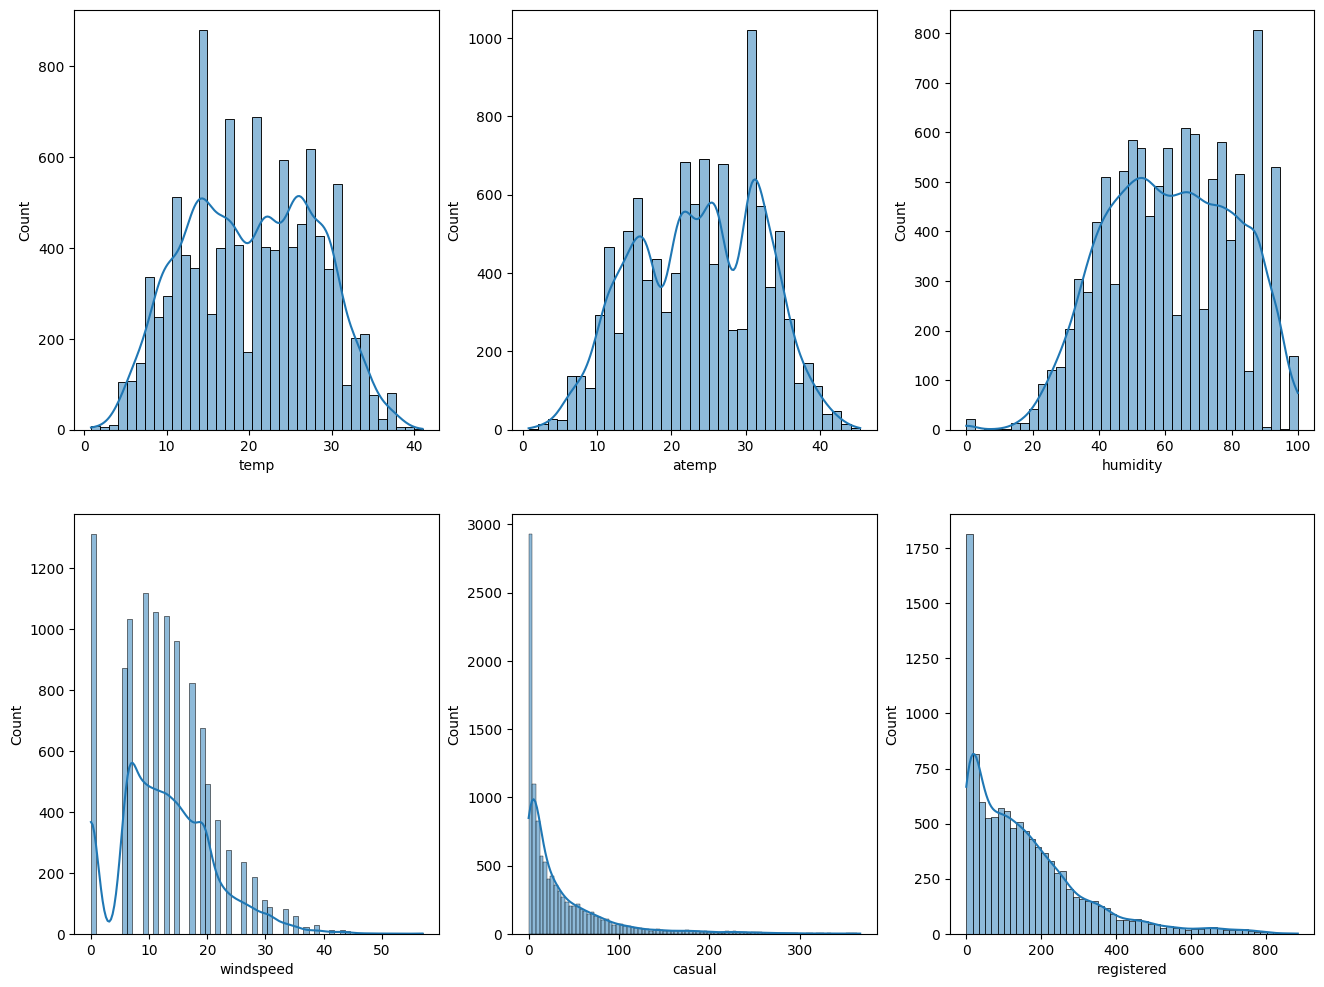

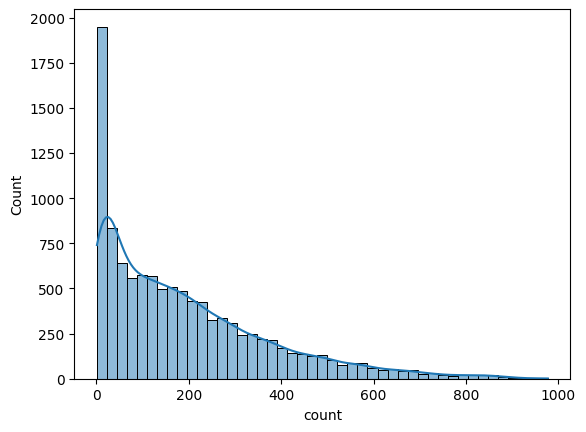

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()
sns.histplot(df[num_cols[-1]], kde=True)
plt.show()

Insights:
* We can see that graphs of Casual, registered and Count of bikes are looking like a Log Normal Distribution.
* Graphs of Temp, atemp and humidity looks like they follow a Normal Distribution.
* Windspeed follows Binomial distribution.

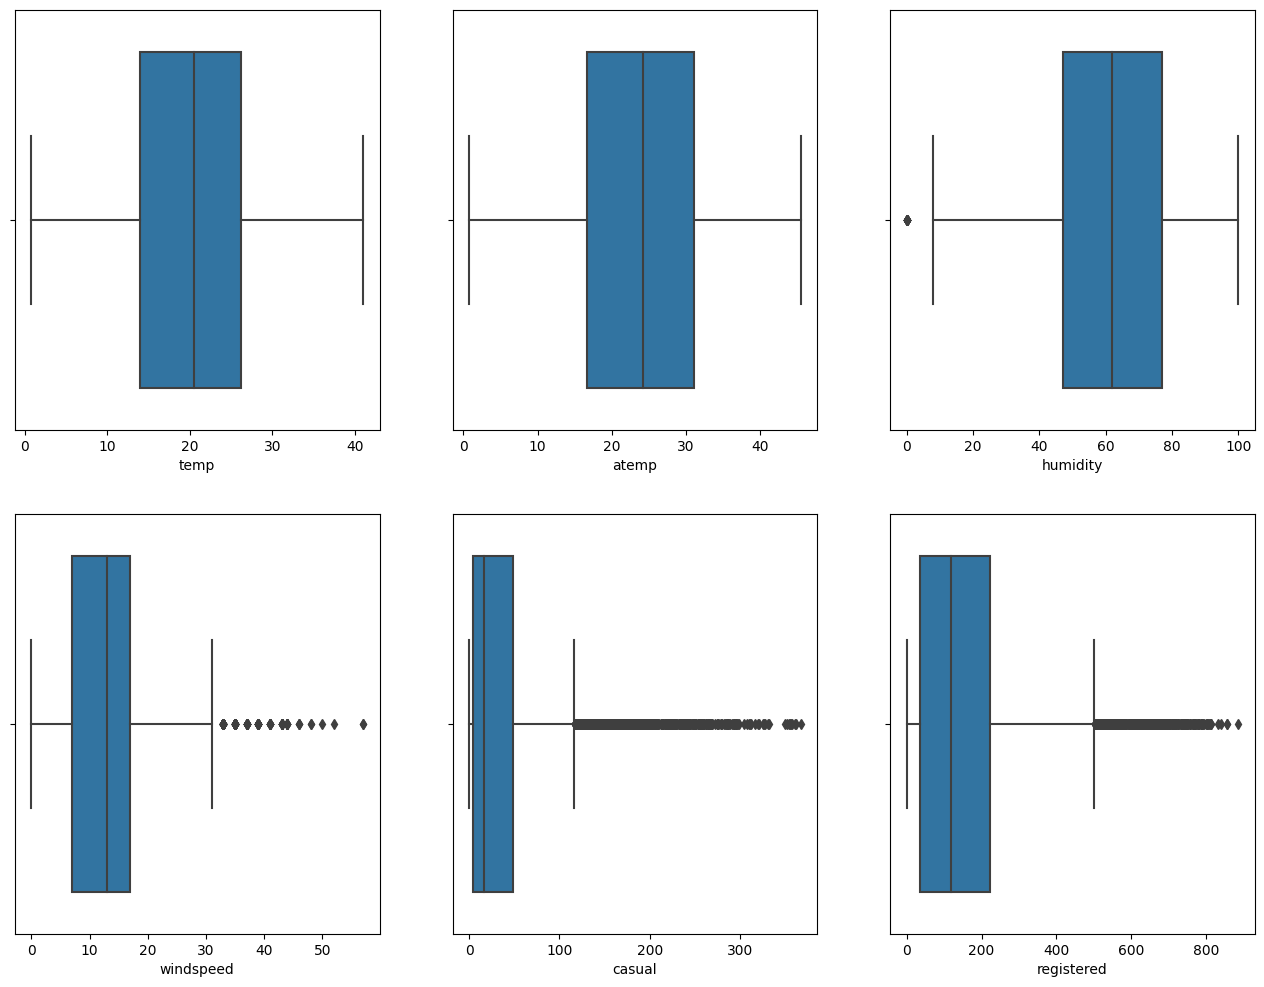

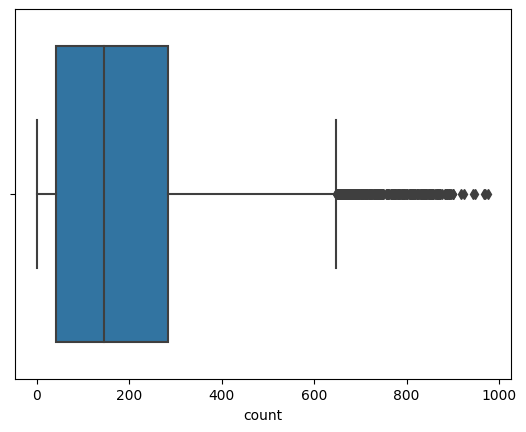

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
        index += 1

plt.show()
sns.boxplot(x=df[num_cols[-1]])
plt.show()

* Windspeed, Casual, Registered and count have outliers.

## Bi-Variate Analysis

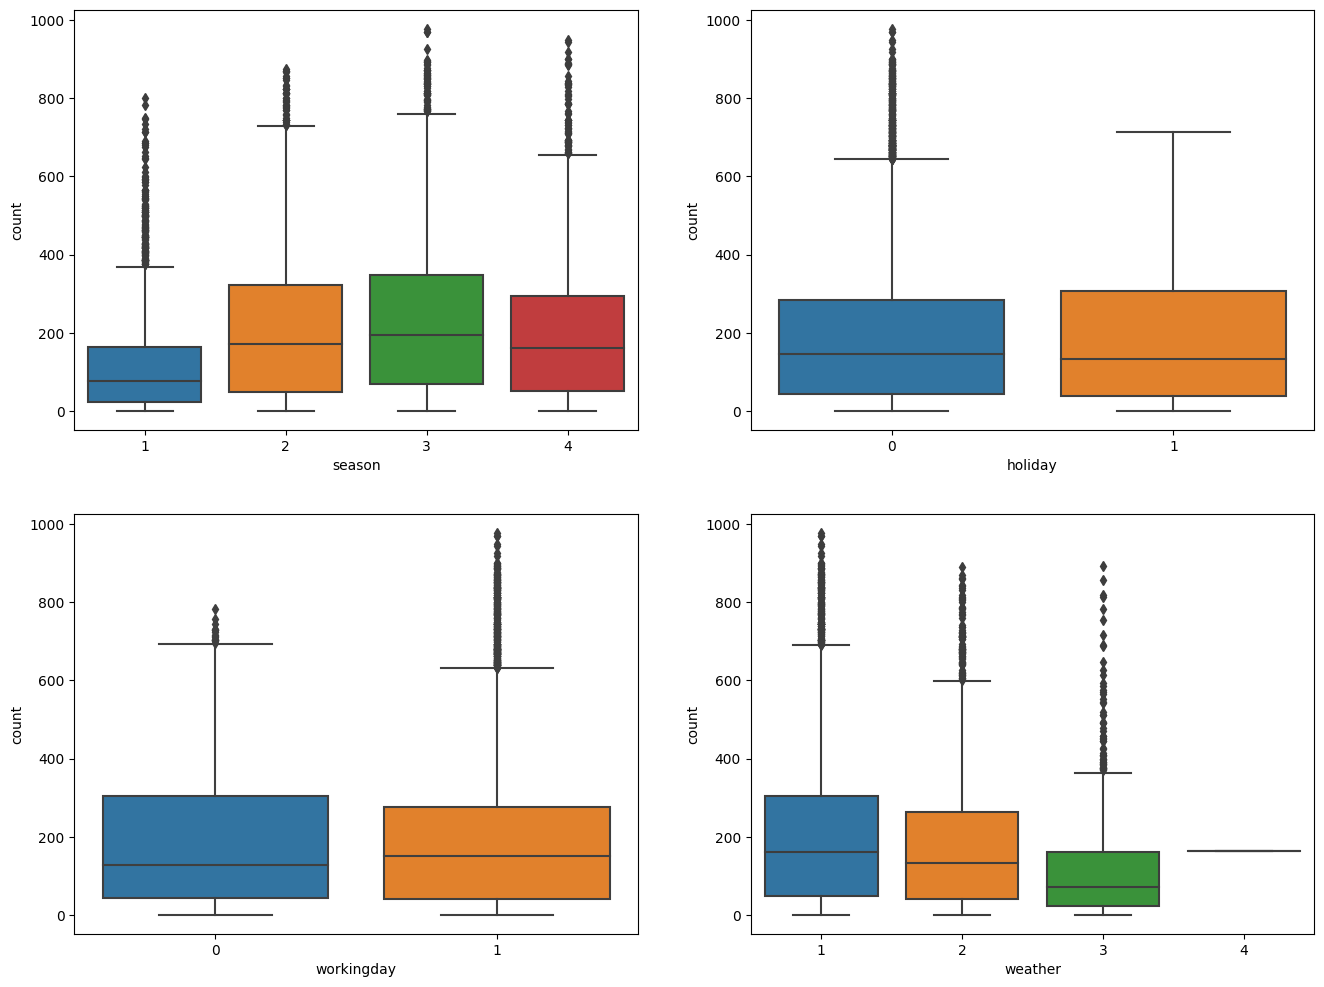

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

* Summer and fall seasons have more bikes rented as compared to other seasons.

* Whenever its a holiday more bikes are rented. However, the number is not significantly high.

* It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.

* Whenever there is rain, thunderstorm, snow or fog, less bikes are rented.

<ipython-input-21-6522c2b4e5f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


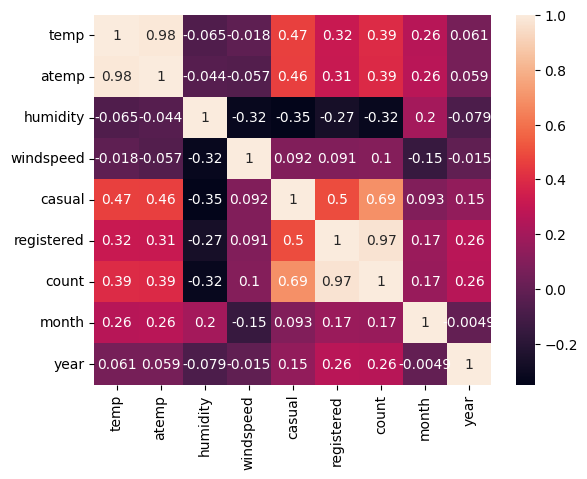

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

*
* Temperature and atemp are very highly positvely correlated.
* Temperature and humidity are highly negatively correlated.
* Temperature is positively correlated with year, count and casual.

* Atemp is highly correlated with temp
* Atemp is negatively correlated with humidity and windspeed.
* Atemp is positively correlated with year and casual.

* Humidity is negatively correlated with almost everything.
* Humidity is very slightly positively correlated with month.
* Humidity is highly negatively correlated with year followed by humidity and atemp.

* Windspeed is highly positively correlated with causal and registered.

* Count is highly postively correlated with registered.

## Hypothesis Testing

1. Working Day has effect on number of electric cycles rented

2. No. of cycles rented similar or different in different seasons

3. No. of cycles rented similar or different in different weather

4. Weather is dependent on season

### 1. Working Day has effect on number of electric cycles rented


H0 =  Working Day has no effect on number of electric cycles rented

H1 = Working day affects number of electric cycles rented

alpha = 95%


As this is a categorical vs numerical test we will perform a ttest

In [ ]:
df['workingday'].unique()

array([0, 1], dtype=object)

In [ ]:
df_wd0 = df[df['workingday']==0]
df_wd1 = df[df['workingday']==1]

In [ ]:
alpha = 0.05

t_stat, p_value = ttest_ind(df_wd0['count'],df_wd1['count'], alternative = "two-sided")

print("t_stat : ",t_stat)
print("p_value : ",p_value)

alpha= 0.05
if p_value < alpha :
    print("We Reject the Null Hypothesis")
else :
    print("We Fail to Reject the Null Hypothesis")
    print('Interpretation: Working day has no effect on Electric Cycles Rented')

t_stat :  -1.2096277376026694
p_value :  0.22644804226361348
We Fail to Reject the Null Hypothesis
Interpretation: Working day has no effect on Electric Cycles Rented


### 2. Number of cycles rented similar or different in different seasons

In [ ]:
df['season'].unique()

array([1, 2, 3, 4], dtype=object)

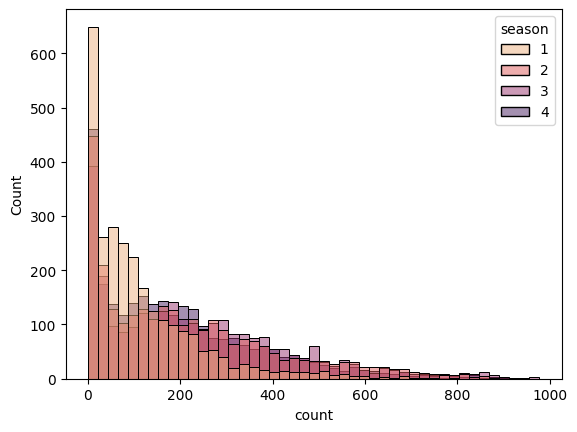

In [ ]:
sns.histplot(data=df, x="count", hue="season", palette = 'flare')
plt.show()

However we find that Log Normal plots are close to Normal distribution

<Axes: xlabel='count', ylabel='Count'>

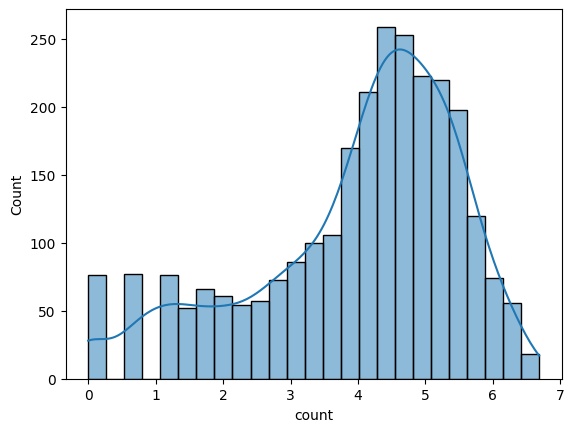

In [ ]:
sns.histplot(data = np.log(df[df['season']==1]['count']),kde=True)

<Axes: xlabel='count', ylabel='Count'>

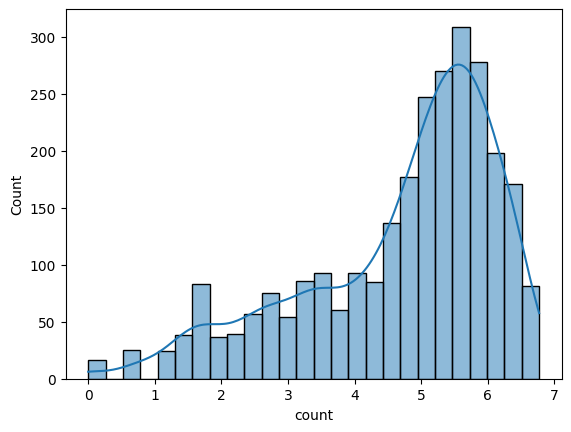

In [ ]:
sns.histplot(data = np.log(df[df['season']==2]['count']),kde=True)

<Axes: xlabel='count', ylabel='Count'>

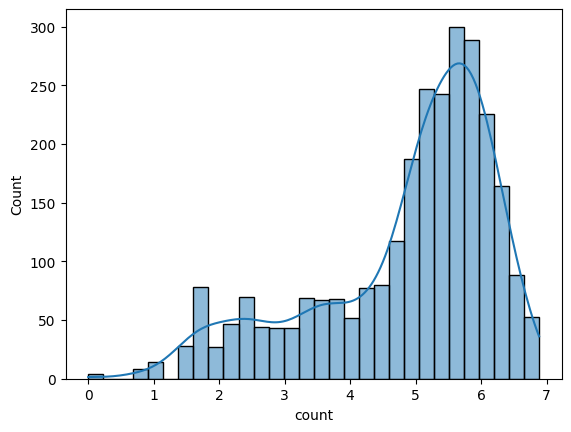

In [ ]:
sns.histplot(data = np.log(df[df['season']==3]['count']),kde=True)

<Axes: xlabel='count', ylabel='Count'>

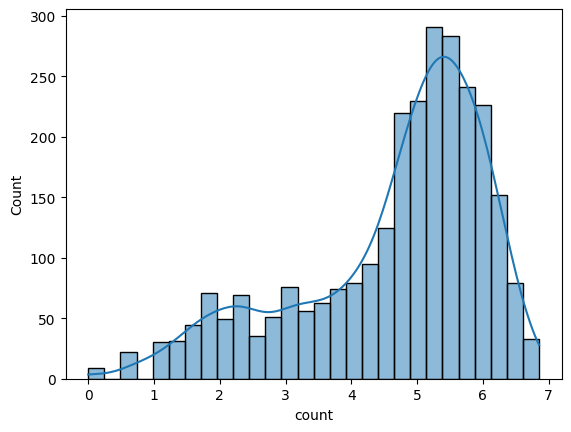

In [ ]:
sns.histplot(data = np.log(df[df['season']==4]['count']),kde=True)

sns.histplot(np.log(data["time"]))

This test is again a numerical vs categorical test but this time there are 4 categories so we will perform annova

There are 3 conditions which should be satisfied to perform an annova test

1. Data should be gaussian which will be verified by a qqplot and a shapiro test.
2. Data should have equal variances among the categories
3. The rows in categories should not be overlapping in terms of data(which is satisfied)


If these three conditions do not satisfy we go with the Kruskal-Wallis test.

In [ ]:
df_s1 = df[df['season']==1]
df_s2 = df[df['season']==2]
df_s3 = df[df['season']==3]
df_s4 = df[df['season']==4]

1. Lets check all the categories data are gaussian or not for which we can plot qqplot first.

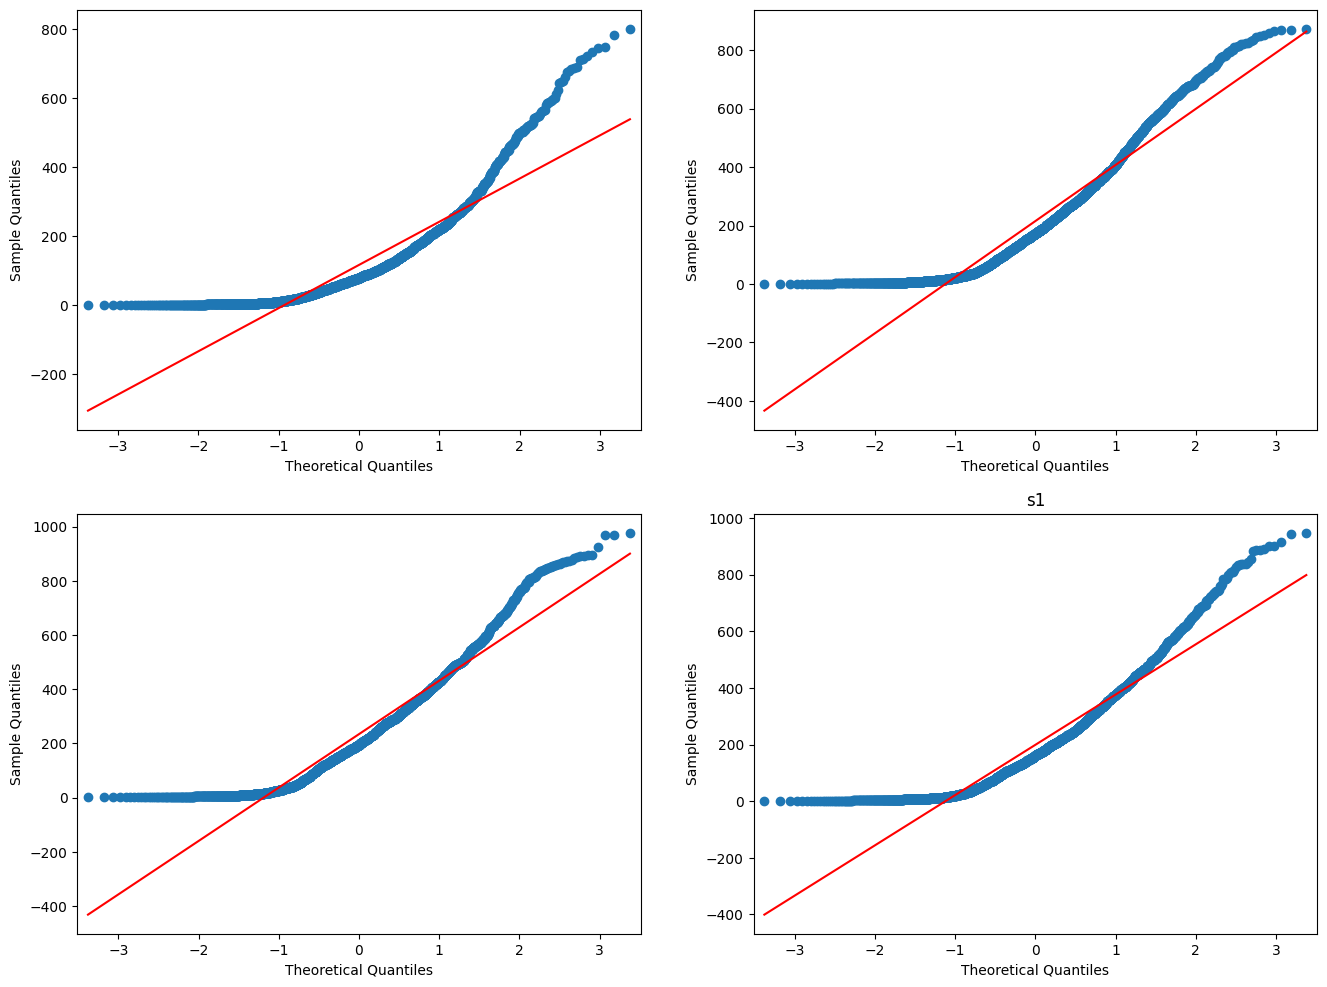

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

plt.title('s1')
qqplot(df_s1['count'], line='s', ax=axis[0, 0])
qqplot(df_s2['count'], line='s', ax=axis[0, 1])
qqplot(df_s3['count'], line='s', ax=axis[1, 0])
qqplot(df_s4['count'], line='s', ax=axis[1, 1])

plt.show()

* According to qqplot we can clearly observe that the data is not normally distributed.

Let us confirm this with shapiro test

Before doing the shapiro test let us define the null and alternate hypothesis.

H0 = Data is normally distributed.

H1 = Data is not normally distributed.

alpha = 0.05

In [ ]:
def seasons(x):
    s_stat, p_value = shapiro(x.sample(100))

    print('P value:', p_value, end="")

    if p_value < 0.05:
        print(', which is significantly lower than our alpha and hence we REJECT the null hypothesis.')
        print('Interpretation: This means that the data is not normally distributed.')
    else:
        print(', which is higher than our alpha and hence we FAIL TO REJECT the null hypothesis.')
        print('Interpretation: This means that the data is normally distributed.')

    return

In [ ]:
print('Season 1 count of cycles rented graph')
seasons(df_s1['count'])

Season 1 count of cycles rented graph
P value: 1.1083365128450318e-11, which is significantly lower than our alpha and hence we REJECT the null hypothesis.
Interpretation: This means that the data is not normally distributed.


In [ ]:
print('Season 2 count of cycles rented graph')
seasons(df_s2['count'])

Season 2 count of cycles rented graph
P value: 1.3357685020309873e-06, which is significantly lower than our alpha and hence we REJECT the null hypothesis.
Interpretation: This means that the data is not normally distributed.


In [ ]:
print('Season 3 count of cycles rented graph')
seasons(df_s3['count'])

Season 3 count of cycles rented graph
P value: 2.3565703486383427e-06, which is significantly lower than our alpha and hence we REJECT the null hypothesis.
Interpretation: This means that the data is not normally distributed.


In [ ]:
print('Season 4 count of cycles rented graph')
seasons(df_s4['count'])

Season 4 count of cycles rented graph
P value: 1.0181629761518707e-07, which is significantly lower than our alpha and hence we REJECT the null hypothesis.
Interpretation: This means that the data is not normally distributed.


* We can clearly see that all the graphs are not normally distributed after confirming with both qqplot and shapiro test.

2. Let us check the 2nd condition which is variances of all the groups whould be equal using the Levene Test.


For this first we will take out the variances of the different Seasons


In [ ]:
print("Variance of Season 1: ", df_s1['count'].var())
print("Variance of Season 2: ", df_s2['count'].var())
print("Variance of Season 3: ", df_s3['count'].var())
print("Variance of Season 4: ", df_s4['count'].var())

Variance of Season 1:  15693.568533717144
Variance of Season 2:  36867.01182553242
Variance of Season 3:  38868.517012662865
Variance of Season 4:  31549.720316669307


Let us set up the null and alternate hypothesis first

H0 =  Variances are Equal

H1 = Variances are NOT Equal

alpha = 0.05


In [ ]:
alpha = 0.05

l_stat,p_value = levene(df_s1['count'],df_s2['count'],df_s3['count'],df_s4['count'])

print("p_value : ",p_value)

if p_value< alpha:
    print("As the p_value is lower than alpha we reject the null hypothesis")
    print("Conclusion : Variances are NOT Equal")
else:
    print("Interpretation : Fail to Reject Ho")
    print("Conclusion : Variances are Equal")

p_value :  1.0147116860043298e-118
As the p_value is lower than alpha we reject the null hypothesis
Conclusion : Variances are NOT Equal


We can clearly see that no condition is satisfied for annova and hence we cannot perform it.

In this case we go with the Kruskal Wallis test.

Let us setup the null and alternate hypothesis for Kruskal-Wallis test.

H0 =  Seasons has no effect on number of electric cycles rented

H1 = Seasons affects the number of electric cycles rented

alpha = 0.05

In [ ]:
alpha = 0.05

k_stat, p_value = kruskal(df_s1['count'], df_s2['count'], df_s3['count'], df_s4['count'])

print("p_value : ",p_value)

if p_value < alpha :
    print("As the p_value is lower than alpha we reject the null hypothesis, which means that season has an effect on electric cycles rented.")
else :
    print("We Fail to Reject the Null Hypothesis")

p_value :  2.479008372608633e-151
As the p_value is lower than alpha we reject the null hypothesis, which means that season has an effect on electric cycles rented.


### 3. Number of cycles rented similar or different in different weather

In [ ]:
df['weather'].unique()

array([1, 2, 3, 4], dtype=object)

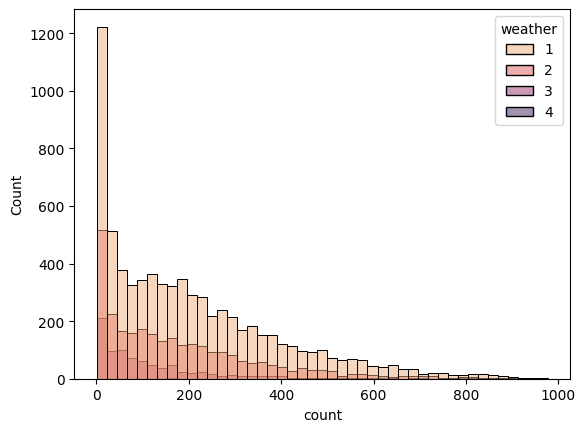

In [ ]:
sns.histplot(data=df, x="count", hue="weather", palette = 'flare' )
plt.show()

However we find that Log Normal plots are close to Normal distribution

<Axes: xlabel='count', ylabel='Count'>

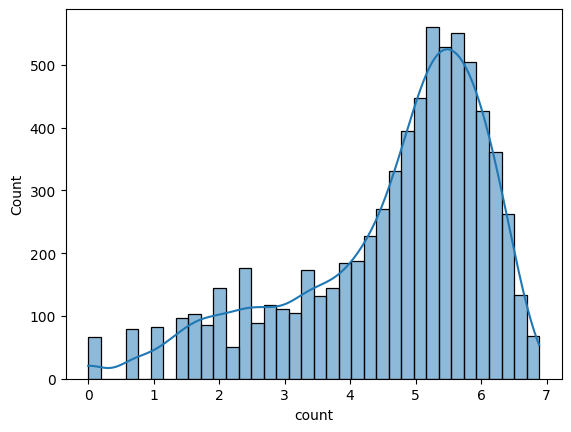

In [ ]:
sns.histplot(data = np.log(df[df['weather']==1]['count']),kde=True)

<Axes: xlabel='count', ylabel='Count'>

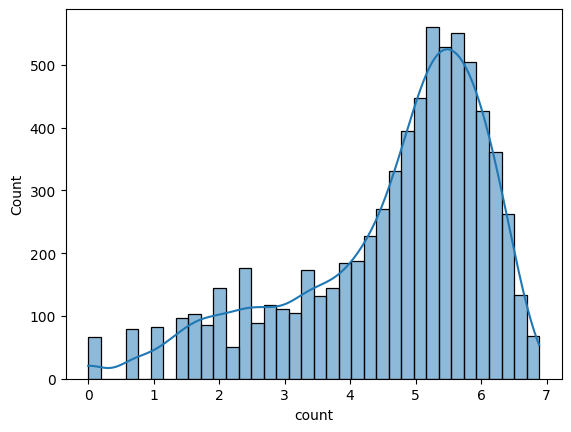

In [ ]:
sns.histplot(data = np.log(df[df['weather']==1]['count']),kde=True)

<Axes: xlabel='count', ylabel='Count'>

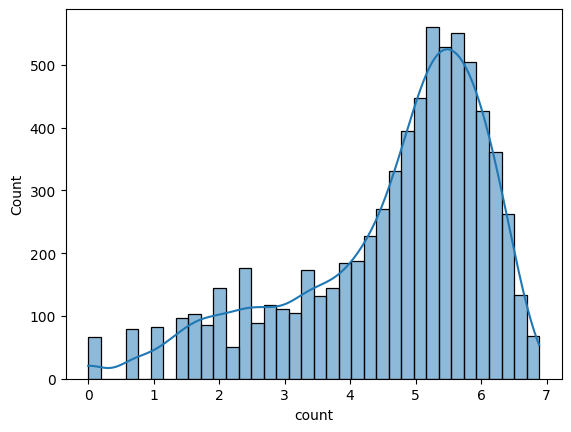

In [ ]:
sns.histplot(data = np.log(df[df['weather']==1]['count']),kde=True)

<Axes: xlabel='count', ylabel='Count'>

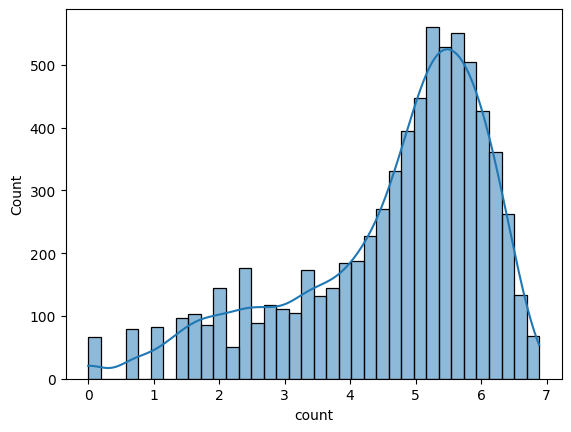

In [ ]:
sns.histplot(data = np.log(df[df['weather']==1]['count']),kde=True)

This test is again a numerical vs categorical test but this time there are 4 categories so we will perform annova

There are 3 conditions which should be satisfied to perform an annova test

1. Data should be gaussian which will be verified by a qqplot and a shapiro test.
2. Data should have equal variances among the categories
3. The rows in categories should not be overlapping in terms of data(which is satisfied)


If these three conditions do not satisfy we go with the Kruskal-Wallis test.

In [ ]:
df_w1 = df[df['weather']==1]
df_w2 = df[df['weather']==2]
df_w3 = df[df['weather']==3]
df_w4 = df[df['weather']==4]

1. Lets check all the categories data are gaussian or not which qqplot first.

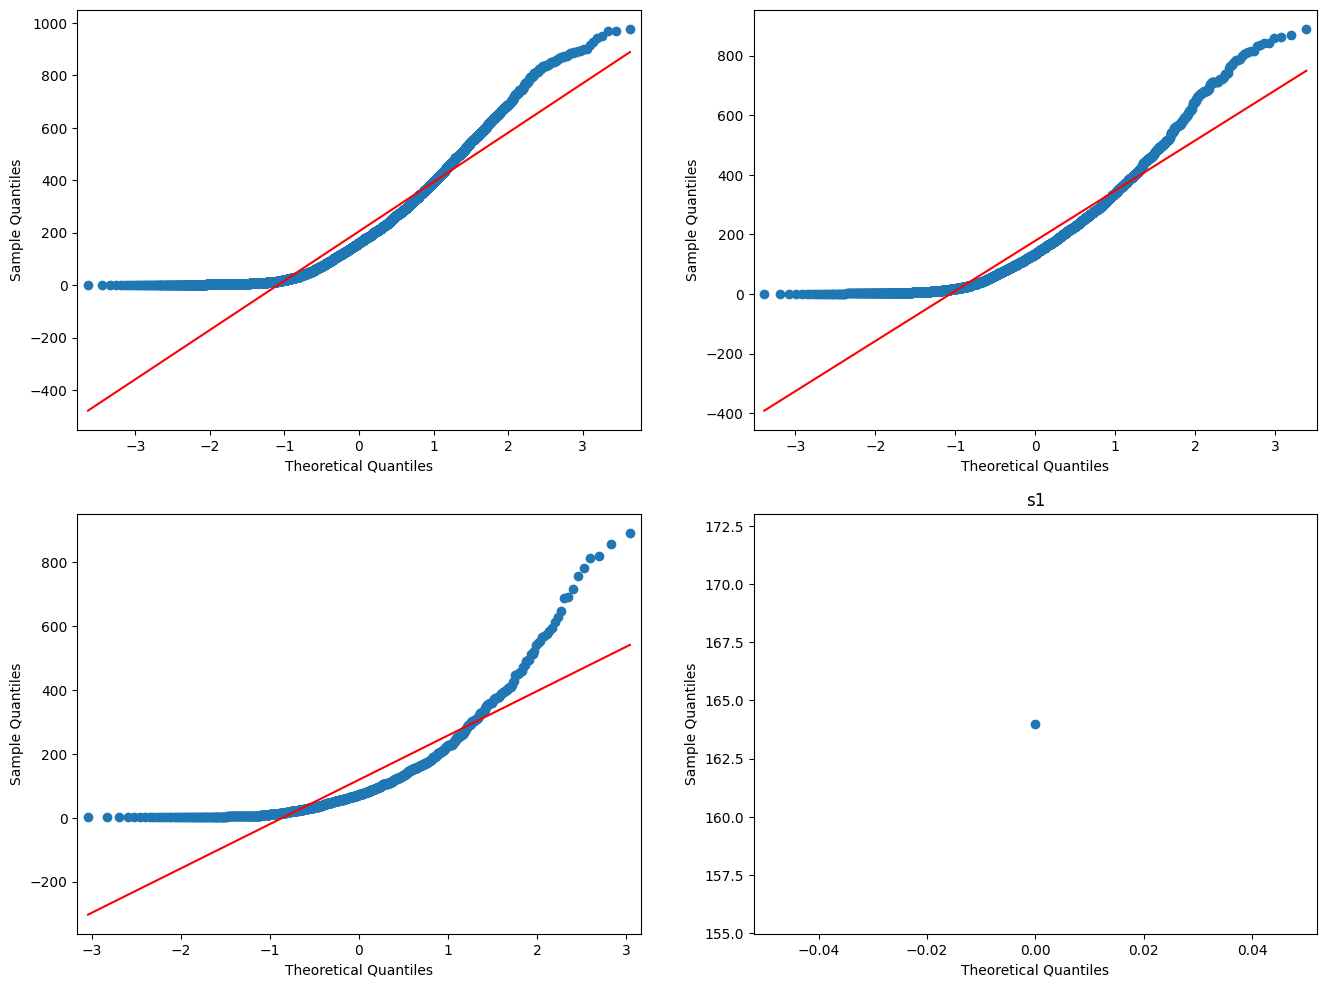

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

plt.title('s1')
qqplot(df_w1['count'], line='s', ax=axis[0, 0])
qqplot(df_w2['count'], line='s', ax=axis[0, 1])
qqplot(df_w3['count'], line='s', ax=axis[1, 0])
qqplot(df_w4['count'], line='s', ax=axis[1, 1])

plt.show()

* According to qqplot we can clearly observe that the data is not normally distributed.

* As there is only on value in the 4th plot we should not consider the season as it anyways does not affect the dataset anyway.

Let us confirm this with shapiro test

Before doing the shapiro test let us define the null and alternate hypothesis.

H0 = Data is normally distributed.

H1 = Data is not normally distributed.

alpha = 0.05

In [ ]:
def weather(x):
    s_stat, p_value = shapiro(x.sample(100))

    print('P value:', p_value, end="")

    if p_value < 0.05:
        print(', which is significantly lower than our alpha and hence we REJECT the null hypothesis.')
        print('Interpretation: This means that the data is not normally distributed.')
    else:
        print(', which is higher than our alpha and hence we we FAILED TO REJECT the null hypothesis.')
        print('Interpretation: This means that the data is normally distributed.')

    return

In [ ]:
print('Weather 1 count of cycles rented graph')
seasons(df_w1['count'])

Weather 1 count of cycles rented graph
P value: 4.40976926086023e-08, which is significantly lower than our alpha and hence we REJECT the null hypothesis.
Interpretation: This means that the data is not normally distributed.


In [ ]:
print('Weather 2 count of cycles rented graph')
seasons(df_w2['count'])

Weather 2 count of cycles rented graph
P value: 1.0335833877661571e-07, which is significantly lower than our alpha and hence we REJECT the null hypothesis.
Interpretation: This means that the data is not normally distributed.


In [ ]:
print('Weather 3 count of cycles rented graph')
seasons(df_w3['count'])

Weather 3 count of cycles rented graph
P value: 9.227835509606486e-12, which is significantly lower than our alpha and hence we REJECT the null hypothesis.
Interpretation: This means that the data is not normally distributed.


* We can clearly see that all the graphs are not normally distributed after confirming with both qqplot and shapiro test.``

2. Let us check the 2nd condition which is variances of all the groups whould be equal using the Levene Test.


Let us first check the variances for the all the weathers

In [ ]:
print("Variance of Weather 1: ", df_w1['count'].var())
print("Variance of Weather 2: ", df_w2['count'].var())
print("Variance of Weather 3: ", df_w3['count'].var())
print("Variance of Weather 4: ", df_w4['count'].var())

Variance of Weather 1:  35328.79846268022
Variance of Weather 2:  28347.248993301797
Variance of Weather 3:  19204.77589271419
Variance of Weather 4:  nan


Let us set up the null and alternate hypothesis first

H0 =  Variances are Equal

H1 = Variances are NOT Equal

alpha = 0.05


In [ ]:
alpha = 0.05

l_stat,p_value = levene(df_w1['count'],df_w2['count'],df_w3['count'])

print("p_value : ",p_value)

if p_value< alpha:
    print("As the p_value is lower than alpha we reject the null hypothesis")
    print("Conclusion : Variances are NOT Equal")
else:
    print("Interpretation : Fail to Reject Ho")
    print("Conclusion : Variances are Equal")

p_value :  6.198278710731511e-36
As the p_value is lower than alpha we reject the null hypothesis
Conclusion : Variances are NOT Equal


We can clearly see that no condition is satisfied for annova and hence we cannot perform it.

In this case we go with the Kruskal Wallis test.

Let us setup the null and alternate hypothesis for Kruskal-Wallis test.

H0 =  Weather has no effect on number of electric cycles rented

H1 = Weather affects the number of electric cycles rented

alpha = 0.05

In [ ]:
alpha = 0.05

k_stat, p_value = kruskal(df_w1['count'], df_w2['count'], df_w3['count'])

print("p_value : ",p_value)

if p_value < alpha :
    print("As the p_value is lower than alpha we reject the null hypothesis, which means that weather has an effect on electric cycles rented.")
else :
    print("We Fail to Reject the Null Hypothesis")

p_value :  3.122066178659941e-45
As the p_value is lower than alpha we reject the null hypothesis, which means that weather has an effect on electric cycles rented.


### 4. Weather is dependent on season (check between 2 predictor variable)

H0 =  Weather has no effect on seasons

H1 = Weather affects the seasons

alpha = 95%

As this is categorical vs categorical we do a chi squared test.

In [ ]:
df1 = pd.crosstab(index = df['weather'],columns = df['season'])
df1

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


* We should drop the 4th row as there is only 1 value which has high variance difference.

In [ ]:
df1.drop([4],inplace = True)

In [ ]:
df1

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225


In [ ]:
alpha= 0.05

chi_stat, p_value, dof, expected = chi2_contingency(df1)

print("chi_stat : ",chi_stat)
print("p_value : ",p_value)

if p_value < alpha :
    print("As p_value is lower than alpha we Reject the Null Hypothesis which means that Weather has an impact on seasons.")
else :
    print("We Fail to Reject the Null Hypothesis")

chi_stat :  46.101457310732485
p_value :  2.8260014509929403e-08
As p_value is lower than alpha we Reject the Null Hypothesis which means that Weather has an impact on seasons.


Summary:
1. Working Day has effect on number of electric cycles rented?

* We performed ttest as it was Numerical vs Categorical.
* We Fail to Reject the Null Hypothesis and working day has no effect on Electric Cycles Rented.

2. No. of cycles rented similar or different in different seasons?

* It was numerical vs 4 categories hence we decided to do annova.
* We checked all the conditions for Annova and saw that the conditions dont satisfy. Hence, we proceeded with the Kruskal Wallis test.
* As the p_value is lower than alpha we reject the null hypothesis.
* Season affects the number of electric cycles rented.

3. No. of cycles rented similar or different in different weather?

* It was numerical vs 4 categories hence we decided to do annova.
* We observed that the 4th weather was not of any significant use as it only had 1 row hence we did not consider it for further tests.
* We checked all the conditions for Annova and saw that the conditions dont satisfy. Hence, we proceeded with the Kruskal Wallis test.
* As the p_value is lower than alpha we reject the null hypothesis.
* Weather affects the number of electric cycles rented.

4. Weather is dependent on season?

* We went ahead with the chi squared test as it was categorical vs categorical.
* As p_value is lower than alpha we Reject the Null Hypothesis.
* Weather has an impact on seasons.